In [ ]:
from google.colab import files
files.upload()
import tensorflow as tf
print(tf.__version__)


Saving kaggle.json to kaggle.json
2.12.0


In [ ]:
# Set up the Kaggle environment
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Chest X-Ray Images (Pneumonia) dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '/content/chest_xray/train'
VAL_DIR = '/content/chest_xray/val'
TEST_DIR = '/content/chest_xray/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation and Rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    VAL_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Keep data in same order as labels
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=validation_generator, epochs=10)



Epoch 1/10
163/163 [==============================] - 84s 417ms/step - loss: 0.3659 - accuracy: 0.8426 - val_loss: 0.7765 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 66s 408ms/step - loss: 0.2223 - accuracy: 0.9120 - val_loss: 0.6270 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 65s 400ms/step - loss: 0.1855 - accuracy: 0.9241 - val_loss: 1.0964 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 66s 406ms/step - loss: 0.1734 - accuracy: 0.9289 - val_loss: 0.7551 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 65s 401ms/step - loss: 0.1551 - accuracy: 0.9385 - val_loss: 0.7735 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 68s 417ms/step - loss: 0.1355 - accuracy: 0.9500 - val_loss: 0.7562 - val_accuracy: 0.6875
Epoch 7/10
163/163 [==============================] - 67s 411ms/step - loss: 0.1467 - accuracy: 0.9438 - val_loss: 0.9979 - val_ac

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")


20/20 [==============================] - 8s 362ms/step - loss: 0.6873 - accuracy: 0.7901
Test accuracy: 79.01%


In [ ]:
model.save("my_model.h5")


In [ ]:
from google.colab import files
files.download("my_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileUpload(value={}, description='Upload')

1/1 [==============================] - 0s 19ms/step
Diagnosis: Yes
Confidence: 99.89%


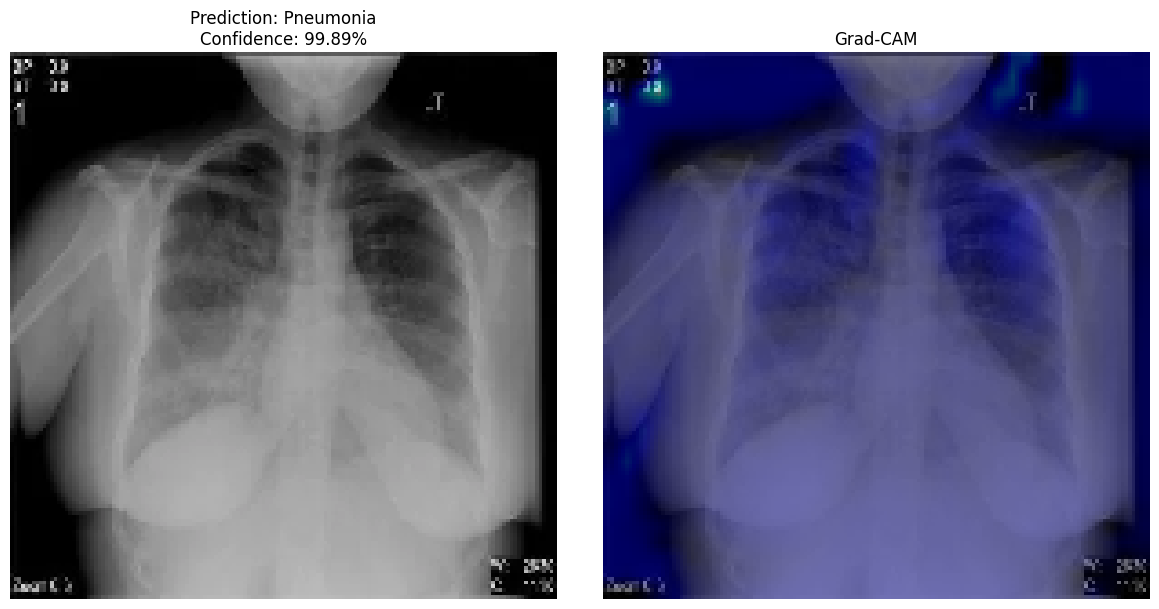

1/1 [==============================] - 0s 22ms/step
Diagnosis: Yes
Confidence: 73.19%


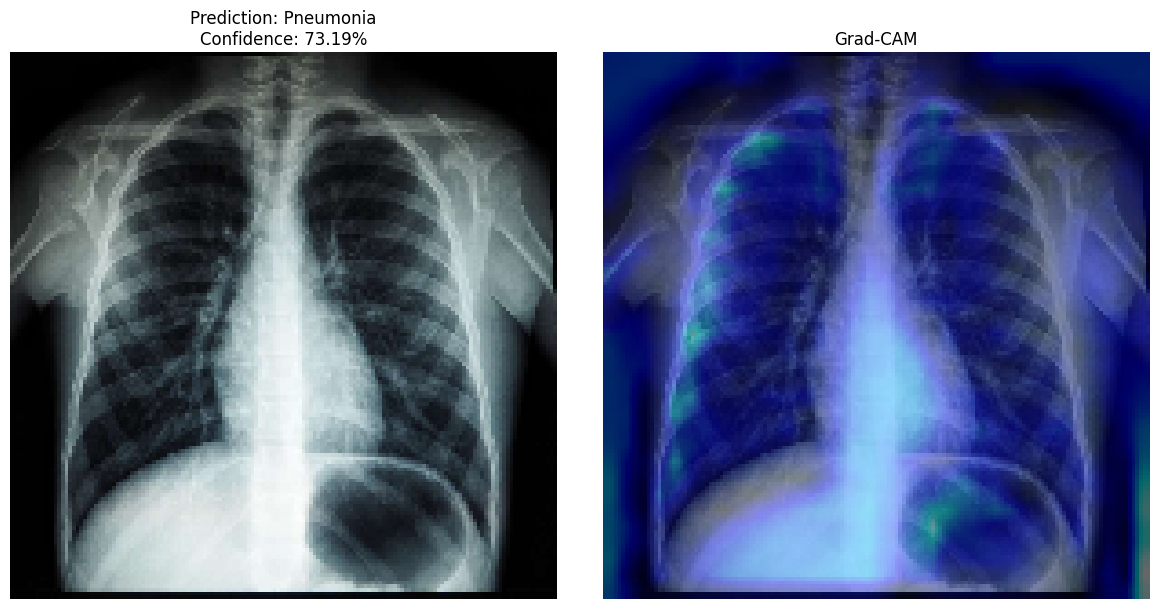

1/1 [==============================] - 0s 20ms/step
Diagnosis: No
Confidence: 28.23%


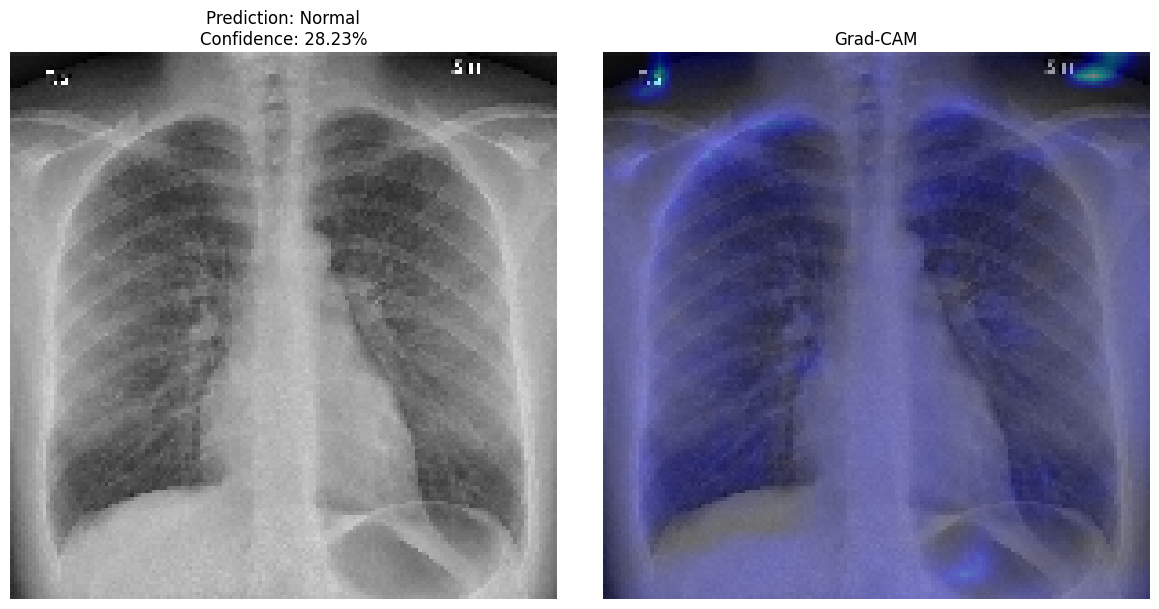

1/1 [==============================] - 0s 18ms/step
Diagnosis: No
Confidence: 13.70%


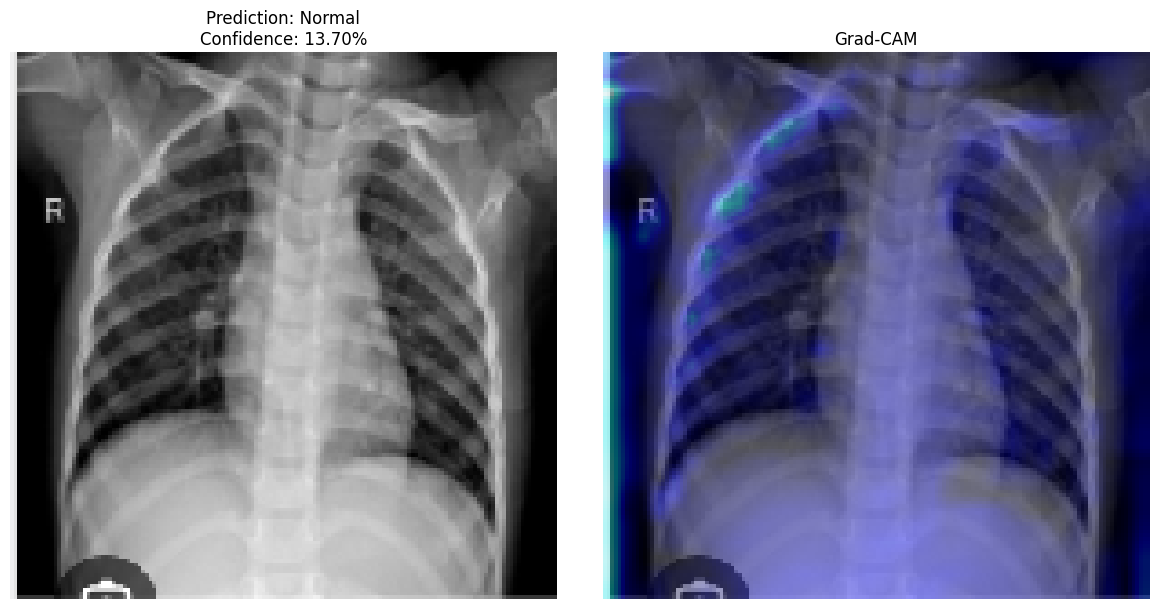

1/1 [==============================] - 0s 18ms/step
Diagnosis: No
Confidence: 13.70%


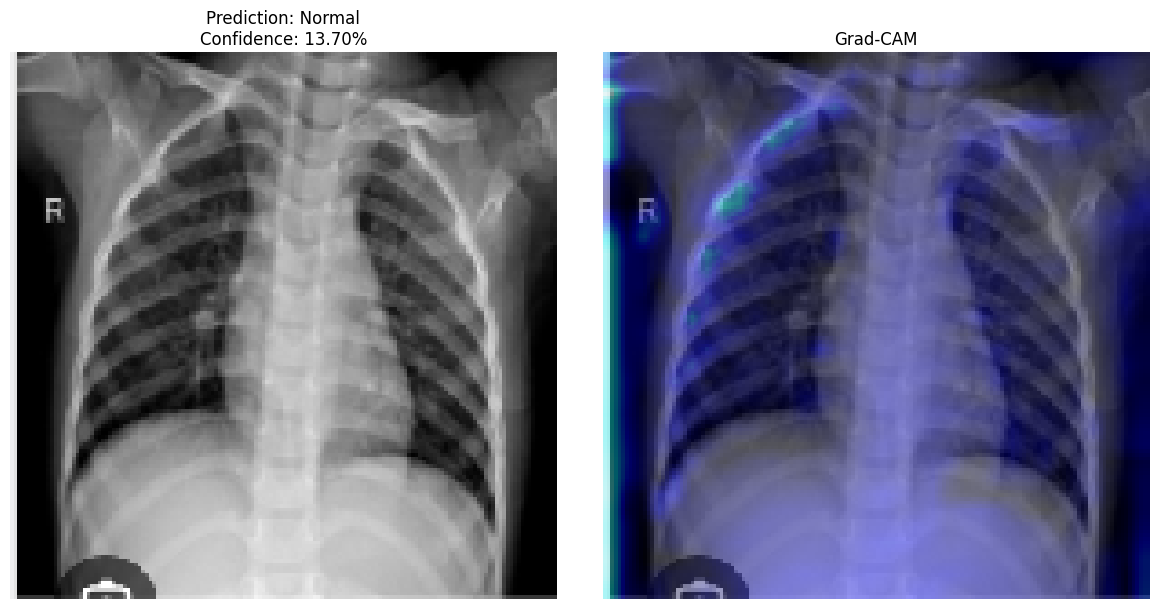

1/1 [==============================] - 0s 19ms/step
Diagnosis: Yes
Confidence: 99.84%


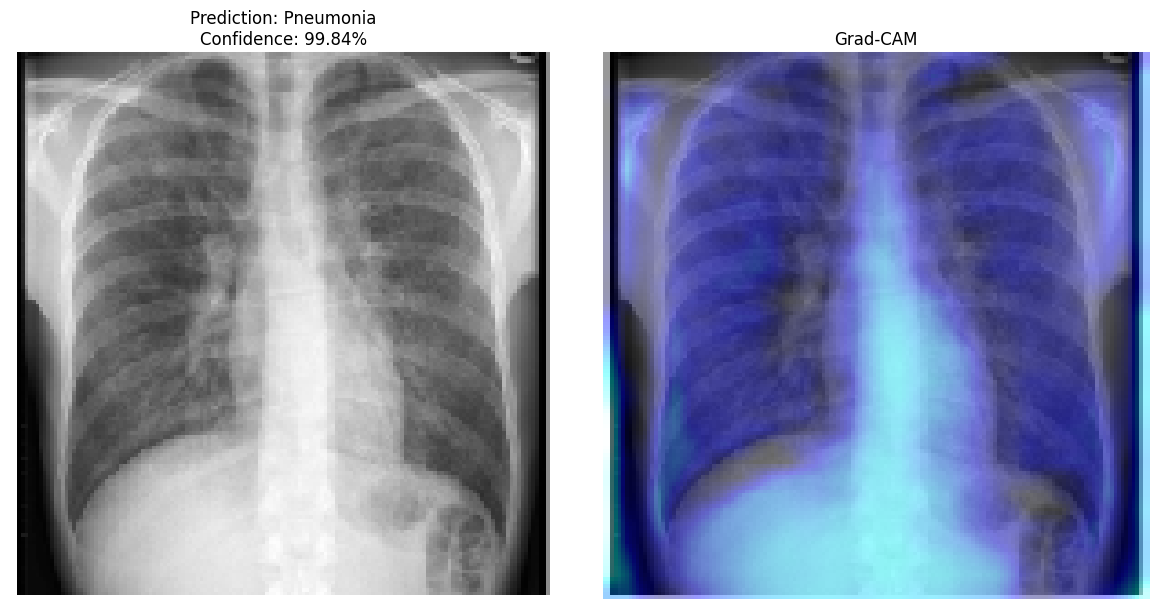

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from IPython.display import display
import ipywidgets as widgets

# The rest of your code remains the same...

# Save the model
model.save("pneumonia_model.h5")

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        class_channel = preds[:, 0]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def predict_image_with_info(model, image_path):
    # Load and preprocess image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Predict the class
    prediction = model.predict(img_array)
    confidence = prediction[0][0]  # Since it's binary classification, only one output neuron is there

    # Make a diagnosis based on confidence threshold
    if confidence > 0.5:
        diagnosis = 'Yes'
        class_idx=1  # Pneumonia
    else:
        diagnosis = 'No'
        class_idx=0  # No Pneumonia

    print(f"Diagnosis: {diagnosis}")
    print(f"Confidence: {confidence*100:.2f}%")

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, "conv2d_2")

    heatmap = cv2.resize(heatmap, (img.width, img.height))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
    superimposed_img = cv2.addWeighted(np.array(img), 0.6, heatmap, 0.4, 0)

    # Display original and Grad-CAM image
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img)
    ax[0].set_title(f"Prediction: {'Pneumonia' if class_idx else 'Normal'}\nConfidence: {confidence*100:.2f}%")
    ax[0].axis('off')
    ax[1].imshow(superimposed_img)
    ax[1].set_title("Grad-CAM")
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

# Upload Button for Image
upload_button = widgets.FileUpload()

def on_upload_change(change):
    for name, file_info in upload_button.value.items():
        image_path = name
        with open(image_path, "wb") as output_file:
            output_file.write(file_info["content"])
        # Now you have saved the uploaded image to the current directory
        # Call the prediction function
        predict_image_with_info(model, image_path)

upload_button.observe(on_upload_change, names='_counter')
display(upload_button)


In [ ]:
!pip install gdown

import gdown
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from IPython.display import display
import ipywidgets as widgets

# Download the model from Google Drive
url = 'https://drive.google.com/uc?id=1MmxpaKeKSBBMlSLzf2UDrFqMCqj-ylqW'
output = 'my_model.h5'
gdown.download(url, output, quiet=False)

# Load the saved model
model = tf.keras.models.load_model("my_model.h5")

# ... [rest of the code remains unchanged]


Downloading...
From: https://drive.google.com/uc?id=1MmxpaKeKSBBMlSLzf2UDrFqMCqj-ylqW
To: /content/my_model.h5
100%|██████████| 228M/228M [00:01<00:00, 129MB/s]


FileUpload(value={}, description='Upload')

1/1 [==============================] - 1s 721ms/step
Diagnosis: Yes
Confidence: 99.84%


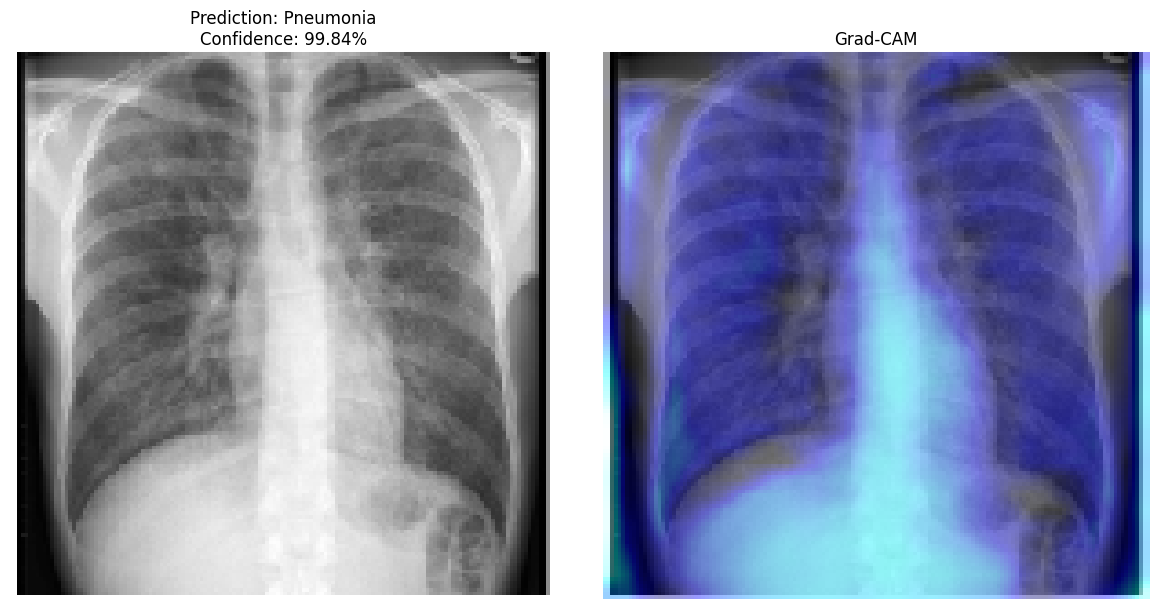

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        class_channel = preds[:, 0]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def predict_image_with_info(model, image_path):
    # Load and preprocess image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Predict the class
    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    # Make a diagnosis based on confidence threshold
    if confidence > 0.5:
        diagnosis = 'Yes'
        class_idx=1  # Pneumonia
    else:
        diagnosis = 'No'
        class_idx=0  # No Pneumonia

    print(f"Diagnosis: {diagnosis}")
    print(f"Confidence: {confidence*100:.2f}%")

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, "conv2d_2")

    heatmap = cv2.resize(heatmap, (img.width, img.height))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
    superimposed_img = cv2.addWeighted(np.array(img), 0.6, heatmap, 0.4, 0)

    # Display original and Grad-CAM image
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img)
    ax[0].set_title(f"Prediction: {'Pneumonia' if class_idx else 'Normal'}\nConfidence: {confidence*100:.2f}%")
    ax[0].axis('off')
    ax[1].imshow(superimposed_img)
    ax[1].set_title("Grad-CAM")
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

# Upload Button for Image
upload_button = widgets.FileUpload()

def on_upload_change(change):
    for name, file_info in upload_button.value.items():
        image_path = name
        with open(image_path, "wb") as output_file:
            output_file.write(file_info["content"])
        # Now you have saved the uploaded image to the current directory
        # Call the prediction function
        predict_image_with_info(model, image_path)

upload_button.observe(on_upload_change, names='_counter')
display(upload_button)